In [1]:
# communication with open data repository
import requests

# data wrangler (pre-processing)
import pandas as pd

# plot figures
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_theme(style="dark")

# helper libs
from IPython.display import display, Markdown
import datetime
import calendar
import json

import warnings
warnings.filterwarnings("ignore")

In [12]:
    %matplotlib inline
        
# %%javascript # needed to prevent the vertical scrollbar to appear
# IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

In [14]:
# read index from the CBS server
odata_index = json.loads( 
    requests.get(
        "https://opendata.cbs.nl/ODataApi/odata/00372eng", verify=False
    ).text
)

In [15]:
odata_index

{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/00372eng/$metadata',
 'value': [{'name': 'TableInfos',
   'url': 'https://opendata.cbs.nl/ODataApi/odata/00372eng/TableInfos'},
  {'name': 'UntypedDataSet',
   'url': 'https://opendata.cbs.nl/ODataApi/odata/00372eng/UntypedDataSet'},
  {'name': 'TypedDataSet',
   'url': 'https://opendata.cbs.nl/ODataApi/odata/00372eng/TypedDataSet'},
  {'name': 'DataProperties',
   'url': 'https://opendata.cbs.nl/ODataApi/odata/00372eng/DataProperties'},
  {'name': 'CategoryGroups',
   'url': 'https://opendata.cbs.nl/ODataApi/odata/00372eng/CategoryGroups'},
  {'name': 'Periods',
   'url': 'https://opendata.cbs.nl/ODataApi/odata/00372eng/Periods'}]}

In [17]:
# read data files
data = {}
for data_file in odata_index["value"]:
    data[data_file["name"]] = json.loads(
        requests.get(data_file["url"], verify=False).text
    )

# keep only the required information...
summary = data["TableInfos"]
description = data["DataProperties"]["value"]
df = data["TypedDataSet"]["value"]

# ... and delete the rest
del data

In [38]:
description

,odata.type,ID,Position,ParentID,Type,Key,Title,Description,ReleasePolicy,Datatype,Unit,Decimals,Default
0,Cbs.OData.TimeDimension,0,0.0,NaN,TimeDimension,Periods,Periods,None,True,NaN,NaN,NaN,NaN
2,Cbs.OData.Topic,2,1.0,1.0,Topic,TotalSupply_1,Total supply,The amount of natural gas primarily available ...,NaN,Long,mln m3,0.0,Impossible
3,Cbs.OData.Topic,3,2.0,1.0,Topic,IndigenousProduction_2,Indigenous production,"Extraction of natural gas from nature, on-shor...",NaN,Long,mln m3,0.0,Impossible
4,Cbs.OData.Topic,4,3.0,1.0,Topic,ProductionFromOtherSources_3,Production from other sources,Natural gas from other energy commodities tran...,NaN,Long,mln m3,0.0,Impossible
6,Cbs.OData.Topic,6,4.0,5.0,Topic,ImportsOfGaseousNaturalGasTotal_4,"Imports of gaseous natural gas, total",Imports of gaseous natural gas through cross b...,NaN,Long,mln m3,0.0,Impossible
7,Cbs.OData.Topic,7,5.0,5.0,Topic,ImportsViaNorway_5,Imports via Norway,Imports of gaseous natural gas through cross b...,NaN,Long,mln m3,0.0,Impossible
8,Cbs.OData.Topic,8,6.0,5.0,Topic,ImportsViaGermany_6,Imports via Germany,Imports of gaseous natural gas through cross b...,NaN,Long,mln m3,0.0,Impossible
9,Cbs.OData.Topic,9,7.0,5.0,Topic,ImportsViaBelgium_7,Imports via Belgium,Imports of gaseous natural gas through cross b...,NaN,Long,mln m3,0.0,Impossible
10,Cbs.OData.Topic,10,8.0,5.0,Topic,ImportsViaUnitedKingdom_8,Imports via United Kingdom,Imports of gaseous natural gas through cross b...,NaN,Long,mln m3,0.0,Impossible
11,Cbs.OData.Topic,11,9.0,5.0,Topic,ImportsViaDenmark_9,Imports via Denmark,Imports of gaseous natural gas through cross b...,NaN,Long,mln m3,0.0,Impossible


In [20]:
# load data into a dataframe
description = pd.DataFrame(description)
df = pd.DataFrame(df)

# turn the description into a data dictionary
description = description[description["Key"] != ""]
data_dictionary = description.set_index("Key")
data_dictionary = data_dictionary[
    [
        "Title",
        "Description",
        "Unit",
    ]
].to_dict("index")

In [21]:
df = df.fillna(0)  # replace null with zeros

In [22]:
# keep only the monthly records
df = df[df["Periods"].str.contains("MM")]

In [24]:
# create year, month, day column, and generate a date column
df["Year"] = df["Periods"].apply(lambda x: int(x[0:4]))
df["Month"] = df["Periods"].apply(lambda x: int(x[6:9]))
df["Day"] = 1
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

# keep a human friendly label for our months
df["MonthLabel"] = df["Month"].apply(lambda x: calendar.month_abbr[x])

# and remove the column "Periods"
df = df.drop(["Periods"], axis = 1)

# optimize the information in the DataFrame
df['Year'] = df['Year'].astype('int16')
df['Month'] = df['Month'].astype('int16')
df['Day'] = df['Day'].astype('int16')

In [25]:
df["import"] = (  # create totals for import
    df["ImportsOfGaseousNaturalGasTotal_4"] + \
        df["ImportsOfLiquefiedNaturalGasLng_10"]
)

df["export"] = (  # create totals for export
    df["ExportsOfGaseousNaturalGasTotal_11"] + \
        df["ExportsOfLiquefiedNaturalGasLng_17"]
)

# product total
df["production"] = df["IndigenousProduction_2"] + \
    df["ProductionFromOtherSources_3"]

# total consumption (better label)
df["consumption"] = df["TotalConsumption_20"]

# in/out
df["in"] = df["import"] + df["production"]
df["out"] = df["export"] + df["consumption"]

In [26]:
# filter data to be limit to this century

# between years...
# df = df[(df['Year'] >= 1900) and (df['Year'] <= 2100)]

# last x years
current_year = int(datetime.datetime.now().date().strftime("%Y"))
df = df[df['Year'] >= current_year - 20] # last 20 years

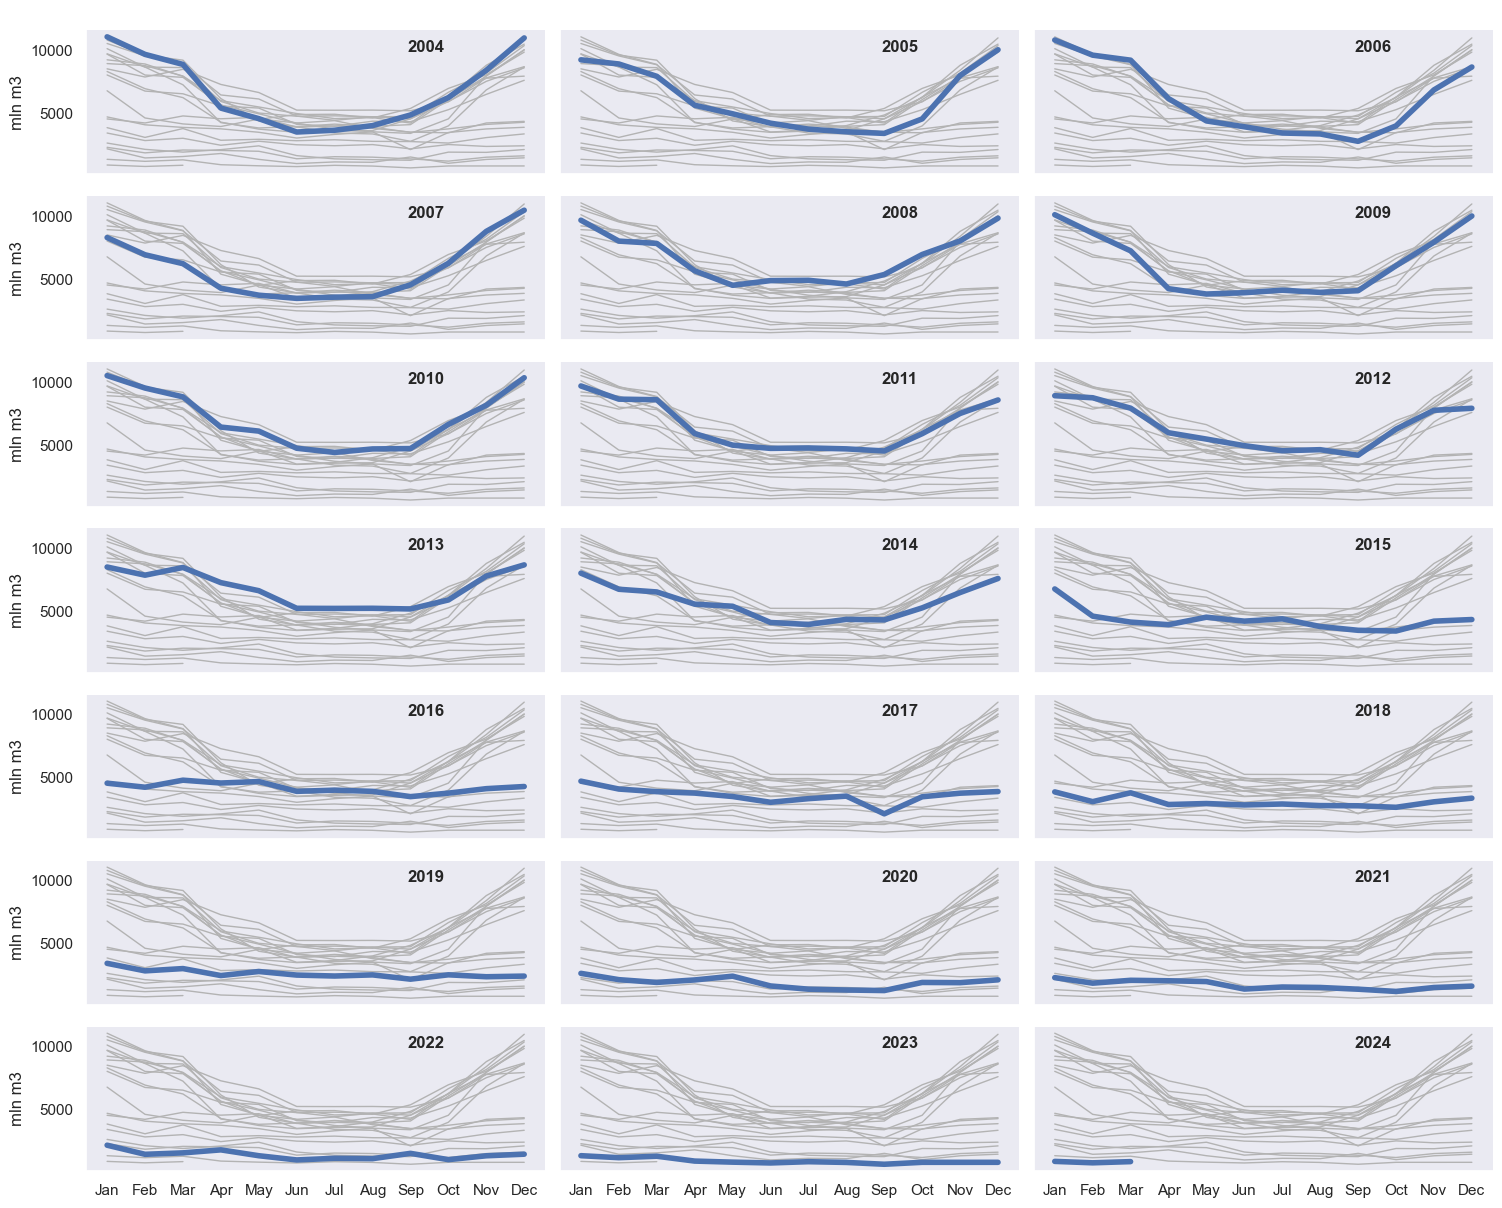

In [27]:
# Natural gas production in the Netherlands

# from the data dictionary retrieve the unit for this column
from matplotlib.pyplot import grid

gas_volume_units = data_dictionary["IndigenousProduction_2"]["Unit"]

# Natural gas production by year (blue line)
g = sns.relplot(
    data=df,
    x="MonthLabel",
    y="IndigenousProduction_2",
    col="Year",
    kind="line",
    linewidth=4,
    zorder=5,
    col_wrap=3,
    height=3,
    aspect=2,
    legend=True,
)

# Iterate over each subplot to customize further (grey line)
for year, ax in g.axes_dict.items():
    ax.text(0.7, 0.85, year, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
        data=df,
        x="MonthLabel",
        y="IndigenousProduction_2",
        units="Year",
        estimator=None,
        color=".7",
        linewidth=1,
        ax=ax,
    )

# layout
g.set_titles(" ")
g.set_axis_labels("", gas_volume_units)
plt.gcf().set_size_inches(15, 12)
plt.show()

In [ ]:
production_consumption_df = pd.melt(  # set data
    df, id_vars=["Year"], value_vars=["production", "consumption"]
)
production_consumption_df.head(10)

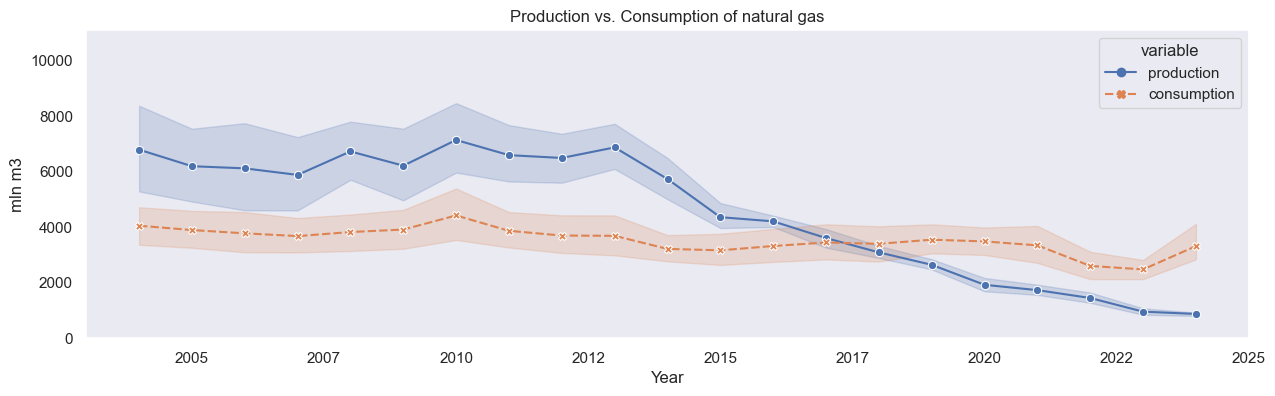

In [28]:
##############################################################################
# production / consumption

sns.lineplot(  # plot
    x="Year",
    y="value",
    hue="variable",
    style="variable",
    markers=True,
    data=production_consumption_df,
).xaxis.set_major_formatter( # force year labels to integers
    FuncFormatter(lambda x, _: int(x))
)

# layout
plt.ylim(0, production_consumption_df["value"].max())
plt.ylabel(gas_volume_units)
plt.title("Production vs. Consumption of natural gas")
plt.gcf().set_size_inches(15, 4)
plt.show()

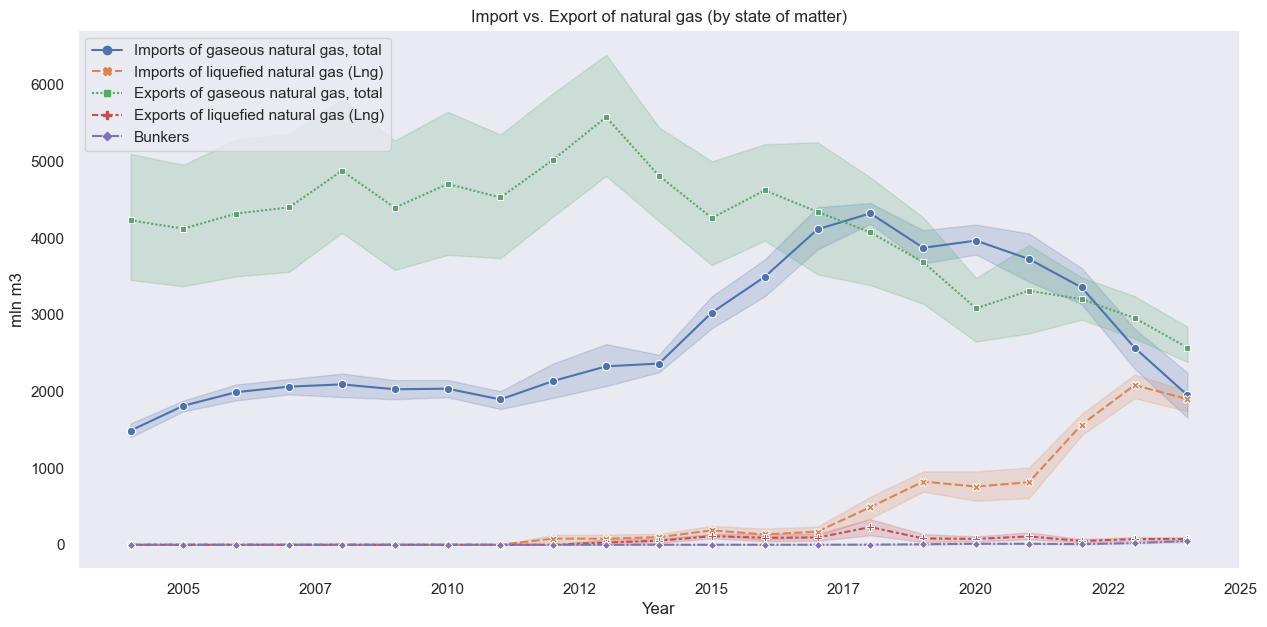

**Imports of gaseous natural gas, total:** Imports of gaseous natural gas through cross border pipelines.

**Imports of liquefied natural gas (Lng):** Imports of liquefied natural gas (Lng).
The gas is liquefied through cooling till about minus 160 degrees Celsius. This makes transport in ships over long distances possible.

**Exports of gaseous natural gas, total:** Exports of gaseous natural gas through cross border pipelines.

**Exports of liquefied natural gas (Lng):** Exports of liquefied natural gas (Lng).
The gas is liquefied through cooling till about minus 160 degrees Celsius. This makes transport in ships over long distances possible.

**Bunkers:** Delivery of fuels for international shipping and aviation, i.e. ships and aircraft departing from Dutch (air)ports and arriving in foreign (air)ports. Bunkers are considered as a form of export and are not included in energy available for consumption in the Netherlands.

In [29]:
##############################################################################
# import vs export by state

import_export_state_df = pd.melt(  # set data
    df,
    id_vars=["Year"],
    value_vars=[
        "ImportsOfGaseousNaturalGasTotal_4",
        "ImportsOfLiquefiedNaturalGasLng_10",
        "ExportsOfGaseousNaturalGasTotal_11",
        "ExportsOfLiquefiedNaturalGasLng_17",
        "Bunkers_18"
    ],
)

# Gas import/export
ie = sns.lineplot(  # plot
    x="Year",
    y="value",
    hue="variable",
    style="variable",
    markers=True,
    data=import_export_state_df,
)

ie.xaxis.set_major_formatter( # force year labels to integers
    FuncFormatter(lambda x, _: int(x))
)

# labels
handles, labels = ie.get_legend_handles_labels()
ie.legend(
    handles,
    [data_dictionary[l]["Title"] for l in labels],
    loc="upper left"
)

# layout
plt.ylabel(gas_volume_units)
plt.title("Import vs. Export of natural gas (by state of matter)")
plt.gcf().set_size_inches(15, 7)
plt.show()

for l in labels:
    display(Markdown(f"**{data_dictionary[l]['Title']}:** {data_dictionary[l]['Description']}"))

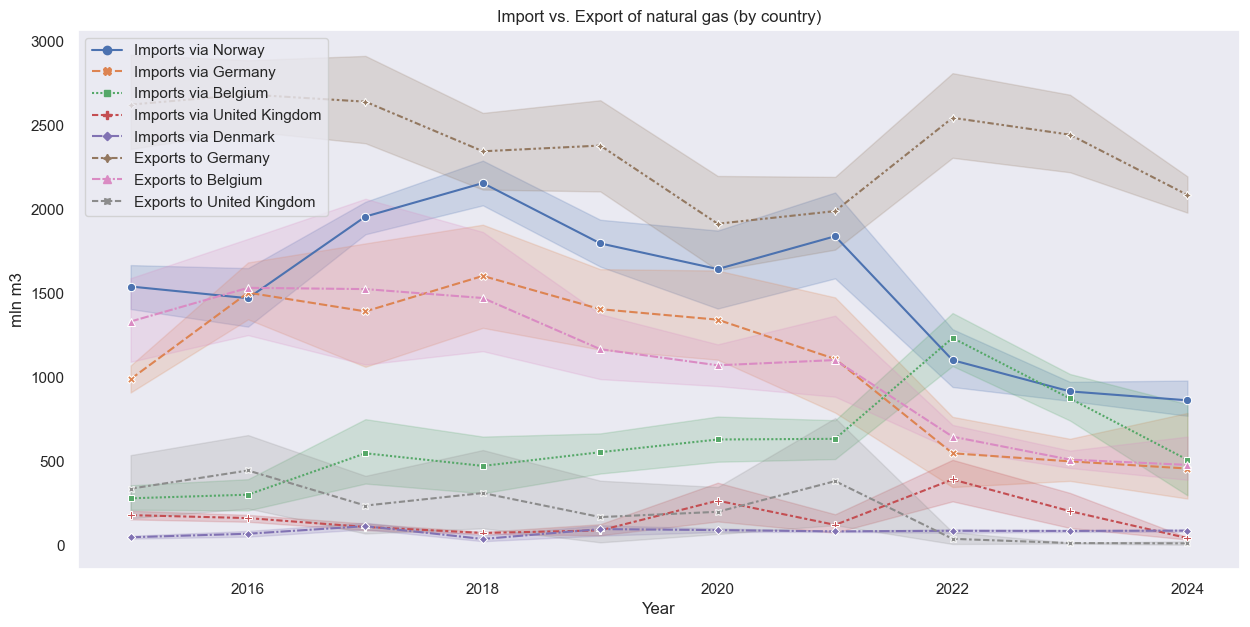

**Imports via Norway:** Imports of gaseous natural gas through cross border pipelines. Norwegian gas passes Germany and passes  the border by Emden

**Imports via Germany:** Imports of gaseous natural gas through cross border pipelines of Germany except for the cross border by Emden.

**Imports via Belgium:** Imports of gaseous natural gas through cross border pipelines from Belgium.

**Imports via United Kingdom:** Imports of gaseous natural gas through cross border pipelines from the United Kingdom.  

**Imports via Denmark:** Imports of gaseous natural gas through cross border pipelines from Denmark.

**Exports to Germany:** Exports of gaseous natural gas through cross border pipelines to Germany, except cross border pipeline bij Emden.

**Exports to Belgium:** Exports of gaseous natural gas through cross border pipelines to Belgium.

**Exports to United Kingdom:** Exports of gaseous natural gas through cross borderBBL- pipelines to United Kingdom.

In [30]:
##############################################################################
# import vs export by state

import_export_country_df = pd.melt(  # set data
    df,
    id_vars=["Year"],
    value_vars=[c for c in df.columns if (c.find("ImportsVia") >= 0) or (c.find("ExportsTo") >= 0)],
)

# Gas import/export
ie = sns.lineplot(  # plot
    x="Year",
    y="value",
    hue="variable",
    style="variable",
    markers=True,
    data=import_export_country_df.query("value > 0")
)

ie.xaxis.set_major_formatter( # force year labels to integers
    FuncFormatter(lambda x, _: int(x))
)

# labels
handles, labels = ie.get_legend_handles_labels()
ie.legend(
    handles,
    [data_dictionary[l]["Title"] for l in labels],
    loc="upper left"
)

# layout
plt.ylabel(gas_volume_units)
plt.title("Import vs. Export of natural gas (by country)")
plt.gcf().set_size_inches(15, 7)
plt.show()

for l in labels:
    display(Markdown(f"**{data_dictionary[l]['Title']}:** {data_dictionary[l]['Description']}"))

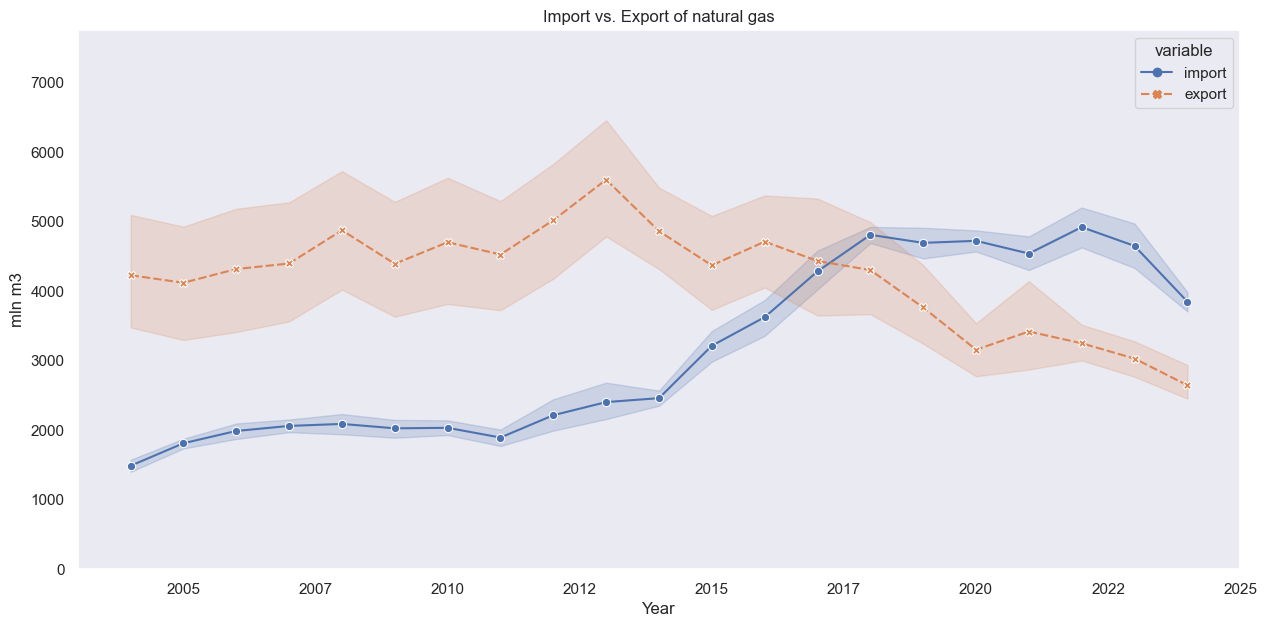

In [31]:
##############################################################################
# import / export
import_export_df = pd.melt(  # set data
    df, id_vars=["Year"], value_vars=["import", "export"]
)

sns.lineplot(  # plot
    x="Year",
    y="value",
    hue="variable",
    style="variable",
    markers=True,
    data=import_export_df,
).xaxis.set_major_formatter( # force year labels to integers
    FuncFormatter(lambda x, _: int(x))
)

# layout
plt.ylim(0, import_export_df["value"].max())
plt.ylabel(gas_volume_units)
plt.title("Import vs. Export of natural gas")
plt.gcf().set_size_inches(15, 7)
plt.show()

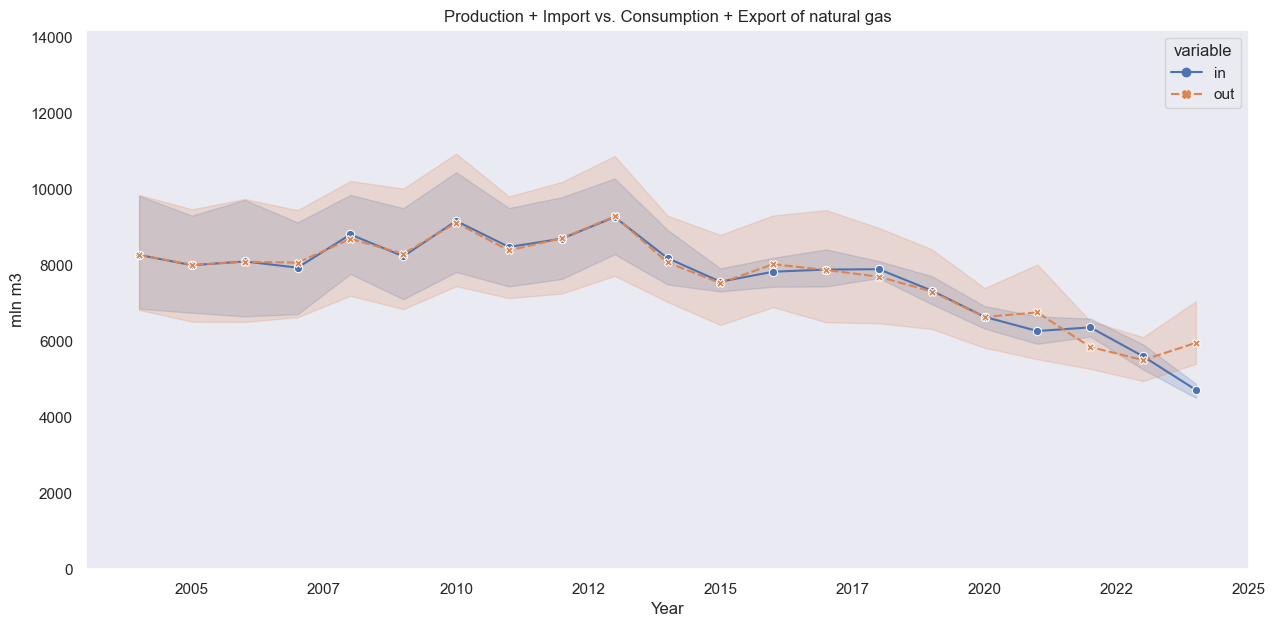

In [32]:
##############################################################################
# in / out
in_out_df = pd.melt( # set data
    df, id_vars=["Year"], value_vars=["in", "out"]
)

sns.lineplot(
    x="Year",
    y="value",
    hue="variable",
    style="variable",
    markers=True,
    data=in_out_df
).xaxis.set_major_formatter( # force year labels to integers
    FuncFormatter(lambda x, _: int(x))
)

# layout
plt.ylim(0, in_out_df["value"].max())
plt.ylabel(gas_volume_units)
plt.title("Production + Import vs. Consumption + Export of natural gas")
plt.gcf().set_size_inches(15, 7)
plt.show()

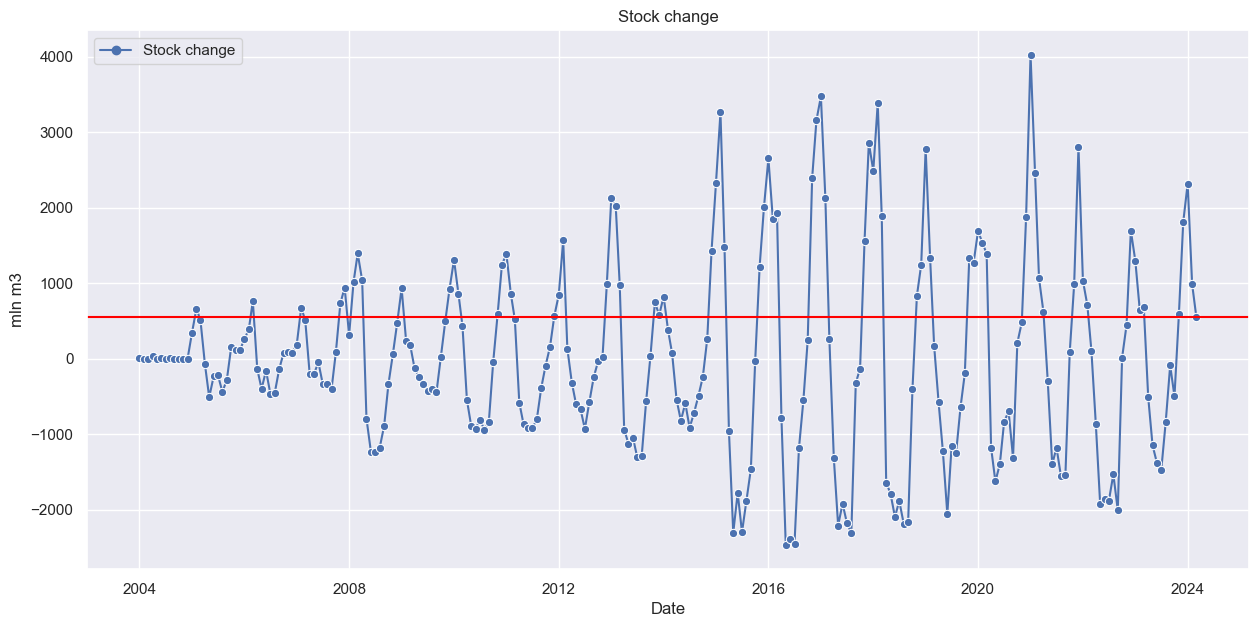

**Stock change**

Stock change of natural gas in underground storages and stock changes of liquefied natural gas (Lng). Includes also small changes in the emergency supply of natural gas and in the natural gas pipelines. During extremely cold weather the emergency supply is used to keep the natural gas supply at the normal level. During hot weather the emergency supply is supplemented again. The change of stock is calculated as the opening stock minus the closing stock, in accordance with international energy statistics guidelines. A positive figure means that the stock has decreased, and the supply of natural gas has thus increased. A negative figure means the opposite: an increase in stock and decrease in consumption.


In [33]:
##############################################################################
# stock
stock_df = pd.melt(  # set data
    df.query("Year >= 2000"),
    id_vars=["Date"],
    value_vars=[
        "StockChange_19"
    ],
)

# Stock in the Netherlands
stock = sns.lineplot(  # plot
    x="Date",
    y="value",
    hue="variable",
    style="variable",
    markers=True,
    data=stock_df,
)

# add line of current value
current_stock = stock_df.iloc[-1]['value']
stock.axhline(current_stock, color="red")

# labels
handles, labels = stock.get_legend_handles_labels()
stock.legend(
    handles,
    [data_dictionary[l]["Title"] for l in labels],
    loc="upper left"
)

# layout
plt.ylabel(gas_volume_units)
plt.grid(True)
plt.title("Stock change")
plt.gcf().set_size_inches(15, 7)
plt.show()

for l in labels:
    display(Markdown(f"**{data_dictionary[l]['Title']}**"))
    display(Markdown(f"{data_dictionary[l]['Description']}"))